# Decision Tree

Q. 유방암 결과를 분류하는 의사결정나무 모델을 만들고 predict method를
이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion
matrix를 구하라.

In [1]:
%config Conpleter.use_jedi = False

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
import pydotplus
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import confusion_matrix

### 데이터 구성하기

In [7]:
import os
os.chdir("/home/piai/문서/2. Big Data 분석")
os.getcwd()
df_raw = pd.read_csv("./IRIS.csv", encoding = 'euc=kr')

In [8]:
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
def diag(x):
    if x == "setosa":
        return 0
    else:
        return 1

In [11]:
# SPECIES열이 '음성', '양성' 을 정수에 대입시켜 변환시켜준다
df_raw['SPECIES'] = df_raw['SPECIES'].apply(diag)
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
def fun_data_layout(v_data):
    print("Data 구조 : ", v_data.shape)
    print()
    
    print('변수 : ', v_data.columns)
    print()

In [13]:
fun_data_layout(df_raw)

Data 구조 :  (150, 5)

변수 :  Index(['SEPAL_LENGTH', 'SEPAL_WIDTH', 'PETAL_LENGTH', 'PETAL_WIDTH',
       'SPECIES'],
      dtype='object')



In [14]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw["SPECIES"]
df_raw_x = df_raw.drop("SPECIES",axis = 1, inplace = False)

df_raw_y.value_counts(normalize=True)

1    0.666667
0    0.333333
Name: SPECIES, dtype: float64

원 데이터에서 0(음성)인 데이터가 1(양성)인 데이터에 비해서 2배 정도 많다

In [15]:
#데이터는 (train(0.6) : test(0.4))의 비율로 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4,
                                                                random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (90, 4)
train data Y size : (90,)
test data X size : (60, 4)
test data Y size : (60,)


In [16]:
df_train_y.value_counts(normalize=True),  df_test_y.value_counts(normalize=True)

(1    0.655556
 0    0.344444
 Name: SPECIES, dtype: float64,
 1    0.683333
 0    0.316667
 Name: SPECIES, dtype: float64)

train 데이터에서는 0인 데이터와 1인 데이터가 비율이 비슷하게 있으나, test 데이터에는 0인 데이터가 훨씬 많은 것을 확인할 수 있다

## Over-sampling : SMOTE

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
df_raw.head(5)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
print(df_raw.value_counts(['SPECIES']),'\n')
print('species = 1 setosa', df_raw.value_counts(df_raw['SPECIES'] == 1) / len(df_raw))

SPECIES
1          100
0           50
dtype: int64 

species = 1 setosa SPECIES
True     0.666667
False    0.333333
dtype: float64


원 데이터에서 0(음성)인 데이터가 1(양성)인 데이터에 비해서 2배 정도 많다

 => SPECIES = 1 양성인 데이터가 적다.

In [20]:
sm = SMOTE(sampling_strategy='auto')
x_resampled, y_resampled = sm.fit_resample(df_train_x, df_train_y)

print('over-sampling 전 : \n', df_train_y.value_counts(), '\n')
print('over-sampling 후 : {}'.format(x_resampled.shape))
print('over-sampling 후 : {}\n'.format(y_resampled.shape))
print('over-sampling 후 1 : {}'.format(sum(y_resampled==1)))
print('over-sampling 후  0 : {}'.format(sum(y_resampled==0)))

over-sampling 전 : 
 1    59
0    31
Name: SPECIES, dtype: int64 

over-sampling 후 : (118, 4)
over-sampling 후 : (118,)

over-sampling 후 1 : 59
over-sampling 후  0 : 59


over -sampling을 하기 전에는 train 데이터에서 0 데이터가 1 데이터에 비해 2배 정도 높았으나 

오버샘플링을 한 결과 0 데이터가 1 데이터의 비율이 동일해진 것을 확인할 수 있다

In [21]:
df_resempled = pd.concat([x_resampled, y_resampled], axis = 1)
print(df_resempled.head())

   SEPAL_LENGTH  SEPAL_WIDTH  PETAL_LENGTH  PETAL_WIDTH  SPECIES
0           5.1          3.4           1.5          0.2        0
1           7.4          2.8           6.1          1.9        1
2           5.7          2.5           5.0          2.0        1
3           6.5          3.2           5.1          2.0        1
4           5.1          3.7           1.5          0.4        0


=> 1의 빈도와 0의 빈도가 동일해졌다

### 기본 옵션으로 모델 생성

In [22]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 1.000


모델 설명력은 train 100%, test 88%로 모델은 train에 과대적합이다

### 모델 Parameter 조정

- min_sample_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [23]:
train_accuracy = []
test_accuracy = []

para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state=1234,
                                min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,1,1.0,1.0
1,2,1.0,1.0
2,3,1.0,1.0
3,4,1.0,1.0
4,5,1.0,1.0
5,6,1.0,1.0
6,7,1.0,1.0
7,8,1.0,1.0
8,9,1.0,1.0
9,10,1.0,1.0


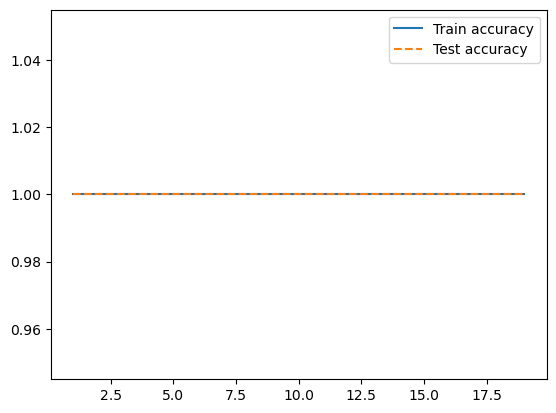

In [24]:
plt.plot(para_leaf,train_accuracy,linestyle = "-",label = "Train accuracy")
plt.plot(para_leaf,test_accuracy,linestyle = "--",label = "Test accuracy")
plt.legend()

min_sample_leaf가 증가할 때 test accuracy는 10까지는 증가하다가 그 이후는 감소한다.

train accuracy는 지속적으로 감소한다.

min_sample_leaf가 10일 때 test score도 높으면서 train accuracy와의 gap도 작다

=> min_sample_leaf는 10으로 결정

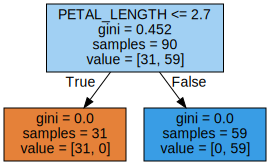

In [25]:
v_feature_name = df_train_x.columns

#노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(random_state = 1234, min_samples_leaf=10)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names= v_feature_name, impurity=True,filled=True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()

fixed_dot_graph = "digraph Tree {\nsize=\"10,10\";\n" + dot_graph.split('{', 1)[1]

display(graphviz.Source(fixed_dot_graph))

- min_sample_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [26]:
train_accuracy = []
test_accuracy = []

para_split = [n_split * 4 for n_split in range(15,25)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, min_samples_leaf=10,
                                min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,60,1.000,1.000
1,64,1.000,1.000
2,68,1.000,1.000
3,72,1.000,1.000
4,76,1.000,1.000
5,80,1.000,1.000
6,84,1.000,1.000
7,88,1.000,1.000
8,92,0.656,0.683
9,96,0.656,0.683


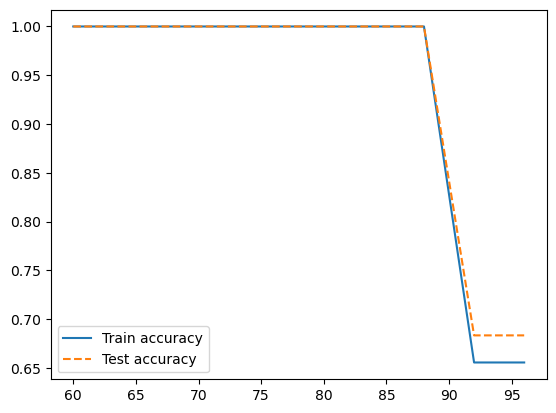

In [27]:
plt.plot(para_split,train_accuracy,linestyle = "-",label = "Train accuracy")
plt.plot(para_split,test_accuracy,linestyle = "--",label = "Test accuracy")
plt.legend()

분리 노드의 최소 자료 수 => 60

- max_depth : 최대 깊이 변경에 따른 모델 성능

In [28]:
train_accuracy = []
test_accuracy = []

# max_depth :최대 깊이 변경
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, min_samples_leaf=10 ,
                                 min_samples_split= 60,
                                max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,1.0,1.0
1,2,1.0,1.0
2,3,1.0,1.0
3,4,1.0,1.0
4,5,1.0,1.0
5,6,1.0,1.0
6,7,1.0,1.0
7,8,1.0,1.0
8,9,1.0,1.0
9,10,1.0,1.0


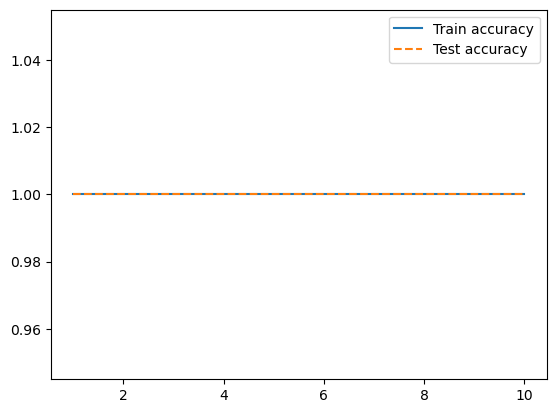

In [29]:
plt.plot(para_depth,train_accuracy,linestyle = "-",label = "Train accuracy")
plt.plot(para_depth,test_accuracy,linestyle = "--",label = "Test accuracy")
plt.legend()

=> max depth는 3

#### 최종 모델 선정

In [30]:
tree_final = DecisionTreeClassifier(min_samples_leaf=10,min_samples_split=60,max_depth=3, random_state=1234,)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=60,
                       random_state=1234)

최종 모델 시각화

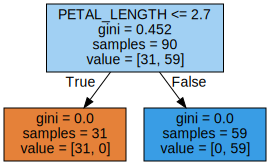

In [31]:
export_graphviz(tree_final, out_file = "tree_final.dot",
               feature_names= v_feature_name, impurity=True,filled=True)
with open("tree_final.dot") as f:
    dot_graph = f.read()

fixed_dot_graph = "digraph Tree {\nsize=\"10,10\";\n" + dot_graph.split('{', 1)[1]
display(graphviz.Source(fixed_dot_graph))

#### 최종 모델을 이용한 분류 예측

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = tree_final.predict(df_test_x)
print('Accuracy :{0:3f}\n'.format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy :1.000000

Confusion matrix: 
[[19  0]
 [ 0 41]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     1.000     1.000        41

    accuracy                          1.000        60
   macro avg      1.000     1.000     1.000        60
weighted avg      1.000     1.000     1.000        60



#### 결론 도출

feature_importances_ : 설명변수의 중요도

In [35]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
2,PETAL_LENGTH,1.0
0,SEPAL_LENGTH,0.0
1,SEPAL_WIDTH,0.0
3,PETAL_WIDTH,0.0


Text(0, 0.5, '변수')

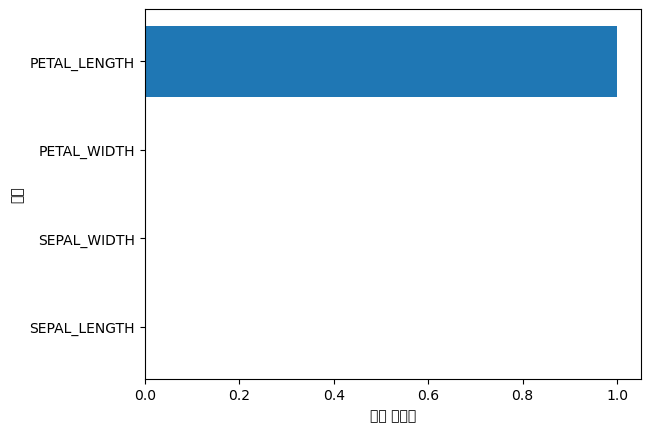

In [36]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

worst_concave_points가 유방암에 가장 큰 영향을 주고 그 다음으로 worst_area, 그 다음으로 worst_radius 순으로 유방암에 영향을 준다고 판단하였다

## Over-sampling Data를 이용한 모델링 및 평가

In [37]:
df_train_x_over, df_test_x_over, df_train_y_over, df_test_y_over = train_test_split(x_resampled, y_resampled,\
                                                                                   test_size = 0.4, stratify = y_resampled, random_state = 1234)
print('분할 전 데이터 현황 설명 : ', x_resampled.shape, "  목표 :", y_resampled.shape)
print('분할 후 설명변수 현황..Train: ', df_train_x_over.shape, "  Test :", df_test_x_over.shape)
print('분할 후 목표변수 현황..Train: ', df_train_y_over.value_counts(), "  Test :", df_test_y_over.value_counts())

분할 전 데이터 현황 설명 :  (118, 4)   목표 : (118,)
분할 후 설명변수 현황..Train:  (70, 4)   Test : (48, 4)
분할 후 목표변수 현황..Train:  0    35
1    35
Name: SPECIES, dtype: int64   Test : 1    24
0    24
Name: SPECIES, dtype: int64


In [38]:
tree_final_over = DecisionTreeClassifier(min_samples_leaf=10,min_samples_split=60,max_depth=3, random_state=1234,)
tree_final_over.fit(df_train_x_over, df_train_y_over)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=60,
                       random_state=1234)

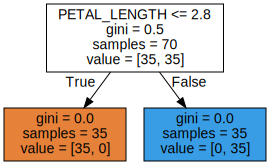

In [39]:
export_graphviz(tree_final_over, out_file = "tree_final_over.dot",feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final_over.dot") as f:
    dot_graph = f.read()

fixed_dot_graph = "digraph Tree {\nsize=\"10,10\";\n" + dot_graph.split('{', 1)[1]
display(graphviz.Source(fixed_dot_graph))

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
y_pred_over = tree_final_over.predict(df_test_x_over)

print('Accuracy :{0:3f}\n'.format(tree_final_over.score(df_test_x_over, df_test_y_over)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y_over, y_pred_over)))
print(classification_report(df_test_y_over, y_pred_over, digits=3))

Accuracy :1.000000

Confusion matrix: 
[[24  0]
 [ 0 24]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        24
           1      1.000     1.000     1.000        24

    accuracy                          1.000        48
   macro avg      1.000     1.000     1.000        48
weighted avg      1.000     1.000     1.000        48



|/|음성|양성|
|------|---|---|
|음성|True negative|False positive|
|양성|False negative|True positive|

* Accuracy :예측값 중 정확한 예측을 어느정도로 했는지 확인하는 지표 => 88%로 괜찮은 성능을 가짐

* f1 score :  macro avg는 단순 평균, weighted avg는 각 클래스에 속하는 표본의 갯수로 가중평균값. 이 둘의 f1-score와 accuracy가 차이가 많이 없어야 괜찮은 모델

* 정밀도(Precision) : Positive로 예측한 경우 중 실제로 Positive인 비율이다, 즉 예측값이 얼마나 정확한가 TP/(TP+FP)

* 재현율(Recall) : 실제 Positive인 것 중 올바르게 Positive를 맞춘 것의 비율 이다다, 즉 실제 정답을 얼마나 맞췄느냐 TP/(TP+FN)

오버샘플링하지 않은 데이터를 가지고 예측을 했을 경우 accuracy가 0.906 이었는데 

오버샘플링된 데이터를 가지고 예측을 진행한 결과를 확인해보니 accuracy가 0.848로 줄어든 것을 확인할 수 있다.

이는 오버샘플링하기 전 데이터에서 음성, 양성 데이터의 비율이 동일하지 않았기 때문이라고 할 수 있다.

1의 경우 이전 confusion matrix에서는 1에 대한 f1-score가 0.812였으나 오버샘플링한 데이터로 예측한 후

1에 대한 f1-score가 0.833으로 소폭 증가하였다. 양성에 대한 데이터가 늘어남으로써 이러한 결과가 나타났다는 결론을 내렸다.

실제로 유방암인데 유방암이라고 판단하지 않는 경우가 제일 위험하다. 이전의 recall값은 0.839였는데 0.761로 소폭 하락했다.

만약 오버샘플링을 하지 않고 모델을 그냥 사용했다면 이 모델의 예측도를 과대평가하는 위험함이 있을 것이다.

In [42]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = tree_final_over.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
2,PETAL_LENGTH,1.0
0,SEPAL_LENGTH,0.0
1,SEPAL_WIDTH,0.0
3,PETAL_WIDTH,0.0


Text(0, 0.5, '변수')

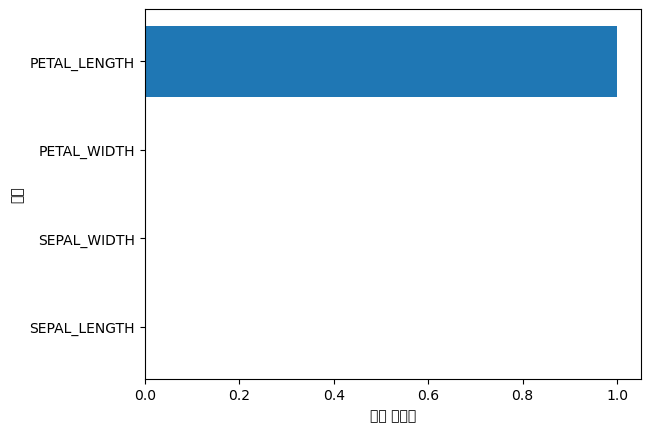

In [43]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

오버샘플링하지 않고 만든 모델은 worst_concave_points가 유방암에 가장 큰 영향을 주고 그 다음으로 worst_area, 그 다음으로 worst_radius 순으로 유방암에 영향을 준다고 판단하였다

하지만 오버샘플링을 통해 얻은 데이터로 모델을 만들었을 때에는 mean_concave_points, worst_perimeter, worst_area 순으로 영향을 준다는 결과로 기존의 모델과 완전히 다른 결과가 나왔다.

In [45]:
different_rows = sum(df_result['original'] != df_result['predict'])
print('전체 행의 수:', df_result.shape[0])
print('예측값이 맞은 행의 수:', df_result.shape[0] - different_rows)
print('예측값이 틀린 행의 수:', different_rows)

전체 행의 수: 48
예측값이 맞은 행의 수: 48
예측값이 틀린 행의 수: 0


--------------------

# Random Forest

Q. 유방암 결과를 분류하는 랜덤 포레스트 모델을 만들고 predict method를
이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion
matrix를 구하라.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
import pydotplus
import warnings
warnings.filterwarnings('ignore')

#### 데이터 구성하기

In [46]:
import os
os.chdir("/home/piai/문서/2. Big Data 분석")
os.getcwd()
df_raw = pd.read_csv("./IRIS.csv", encoding = 'euc=kr')

In [47]:
def diag(x):
    if x == "setosa":
        return 0
    else:
        return 1

In [48]:
# SPECIES열이 '음성', '양성' 을 정수에 대입시켜 변환시켜준다
df_raw['SPECIES'] = df_raw['SPECIES'].apply(diag)
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw["SPECIES"]
df_raw_x = df_raw.drop("SPECIES",axis = 1, inplace = False)

#데이터는 (train(0.6) : test(0.4))의 비율로 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4,
                                                                random_state=1234)
print("train dzta X size : {}".format(df_train_x.shape))
print("train dzta Y size : {}".format(df_train_y.shape))
print("test dzta X size : {}".format(df_test_x.shape))
print("test dzta Y size : {}".format(df_test_y.shape))

train dzta X size : (90, 4)
train dzta Y size : (90,)
test dzta X size : (60, 4)
test dzta Y size : (60,)


#### 기본 옵션으로 모델 생성

In [50]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))

# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 1.000


모델 설명력은 train 97%, test 66%로 모델은 ,train 데이터에 과대적합

- n_estimators : 트리 수 변경에 따른 모델 성능

In [75]:
# train_accuracy = []
# test_accuracy = []

# # n_estimators : 트리 수 변경
# para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

# for v_n_estimators in para_n_tree:
#     rf = RandomForestClassifier(n_estimators=v_n_estimators, random_state = 1234)
#     rf.fit(df_train_x, df_train_y)
#     train_accuracy.append(rf.score(df_train_x, df_train_y))
#     test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# df_accuracy_split = pd.DataFrame()
# df_accuracy_split["n_estimators"] = para_n_tree
# df_accuracy_split["TrainAccuracy"] = train_accuracy
# df_accuracy_split["TestAccuracy"] = test_accuracy
# df_accuracy_split.round(3)

In [74]:
# plt.plot(para_n_tree,train_accuracy,linestyle = "-",label = "Train accuracy")
# plt.plot(para_n_tree,test_accuracy,linestyle = "--",label = "Test accuracy")
# plt.ylabel('accuracy');plt.xlabel("n_estimators")
# plt.legend()

### n_estimators 트리 수 변경에 따른 모델 oob error 변화

In [68]:
# oob_error = []
# for v_n_estimator in range(1,151):
#     rf = RandomForestClassifier(n_estimators= v_n_estimator, oob_score= True, random_state=1234)
#     rf.fit(df_train_x, df_train_y)
#     oob_error.append(1 -rf.oob_score_)

# import plotly.express as px
# import numpy as np

# temp = pd.DataFrame(np.arange(1,151), columns=['n_estimator'])

# temp['oob_error'] = oob_error

# fig = px.scatter(temp, x = 'n_estimator', y = 'oob_error')
# fig.show()
# fig = px.line(temp, x = 'n_estimator', y = 'oob_error')
# fig.show()
# temp.oob_error.argmin(), temp.oob_error.min()

결정 트리 수 증가에 따라 모델의 정확도는 증가한다. OOB Error가 감소하기 때문이다.

모델의 특성을 고려하여 100을 선택한다. 왜나하면 자료가 많다고 판단했기 때문이다

In [73]:
# plt.plot(range(1, 151),oob_error)
# plt.ylabel('oob error')
# plt.xlabel('n_estimators')
# n_estimators = 100

n_estimator = 100으로 선택

- min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [69]:
# train_accuracy = []
# test_accuracy = []

# # min_sample_leaf : 잎사귀 최소 자료 수
# para_leaf = [n_leaf for n_leaf in range(1,21)]

# for v_min_samples_leaf in para_leaf:
#     rf = RandomForestClassifier(random_state = 1234, n_estimators=100,
#                               min_samples_leaf=v_min_samples_leaf)
#     rf.fit(df_train_x, df_train_y)
#     train_accuracy.append(rf.score(df_train_x, df_train_y))
#     test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# df_accuracy_split = pd.DataFrame()
# df_accuracy_split["MinSamplesLeaf"] = para_leaf
# df_accuracy_split["Trainaccuracy"] = train_accuracy
# df_accuracy_split["Testaccuracy"] = test_accuracy
# df_accuracy_split.round(3)

In [70]:
# plt.plot(para_leaf,train_accuracy,linestyle = "-",label = "Train accuracy")
# plt.plot(para_leaf,test_accuracy,linestyle = "--",label = "Test accuracy")
# plt.ylabel("accuracy")
# plt.xlabel("min sampels leaf")
# plt.legend()

min_samples_leaf => 2 로 선택

 - min_samples_split : 분리 노드의 최소 자료 수 변경

In [72]:
# train_accuracy = []
# test_accuracy = []

# # min_sample_split : 분할하기 위한 노드의 최소자료 수
# para_split = [n_split * 2 for n_split in range(1,5)]

# for v_min_samples_split in para_split:
#     rf = RandomForestClassifier(random_state = 1234, n_estimators=100,
#                               min_samples_leaf=2, min_samples_split= v_min_samples_split)
#     rf.fit(df_train_x, df_train_y)
#     train_accuracy.append(rf.score(df_train_x, df_train_y))
#     test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# # 결과 저장    
# df_accuracy_split = pd.DataFrame()
# df_accuracy_split["MinSamplesSplit"] = para_split
# df_accuracy_split["Trainaccuracy"] = train_accuracy
# df_accuracy_split["Testaccuracy"] = test_accuracy
# df_accuracy_split.round(3)

=> min_samples_split 3로 결정

=> 최대깊이 depth는 4로 결정

#### 최종 모델 생성

In [60]:
rf_final = RandomForestClassifier(random_state=1234, n_estimators=100, min_samples_leaf=2,
                                min_samples_split=3, max_depth=4)

rf_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)

# train 모델 정확도
print("Accurcy on training set: {:.3f}".format(rf_final.score(df_train_x,df_train_y)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(rf_final.score(df_test_x,df_test_y)))


print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accurcy on training set: 1.000
Accuracy on test set: 1.000
Confusion matrix: 
[[19  0]
 [ 0 41]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     1.000     1.000        41

    accuracy                          1.000        60
   macro avg      1.000     1.000     1.000        60
weighted avg      1.000     1.000     1.000        60



|/|음성|양성|
|------|---|---|
|음성|True negative|False positive|
|양성|False negative|True positive|

* Accuracy :예측값 중 정확한 예측을 어느정도로 했는지 확인하는 지표 => 91%로 괜찮은 성능을 가짐

* f1 score :  macro avg는 단순 평균, weighted avg는 각 클래스에 속하는 표본의 갯수로 가중평균값. 이 둘의 f1-score와 accuracy가 차이가 많이 없어야 괜찮은 모델이다. f1score가 0과 1 모두 0.8 이상이므로 이 모델은 좋은 모델이라고 할 수 있다.

* 정밀도(Precision) : Positive로 예측한 경우 중 실제로 Positive인 비율이다, 즉 예측값이 얼마나 정확한가 TP/(TP+FP)

* 재현율(Recall) : 실제 Positive인 것 중 올바르게 Positive를 맞춘 것의 비율 이다다, 즉 실제 정답을 얼마나 맞췄느냐 TP/(TP+FN)

의사결정나무를 이용하여 예측을 했을 경우 accuracy가 0.906 이었는데 0.914로 상승한 것을 보아 랜덤포레스트의 모델이 의사결정나무보다 더 높은 정확도를 보여준다. 

실제로 유방암인데 유방암이라고 판단하지 않는 경우가 제일 위험하다. 

이전의 recall값은 0.761이었는데 0.806으로 소폭 상승하였다. 이 모델의 경우 유방암이 걸린 사람을 더 잘 알 수 있게 하는 모델로 전에 만든 의사결정나무보다 더 좋은 설명력을 가진 모델이라고 할 수 있다. 



- 최종 모델 시각화 : graphviz 활용

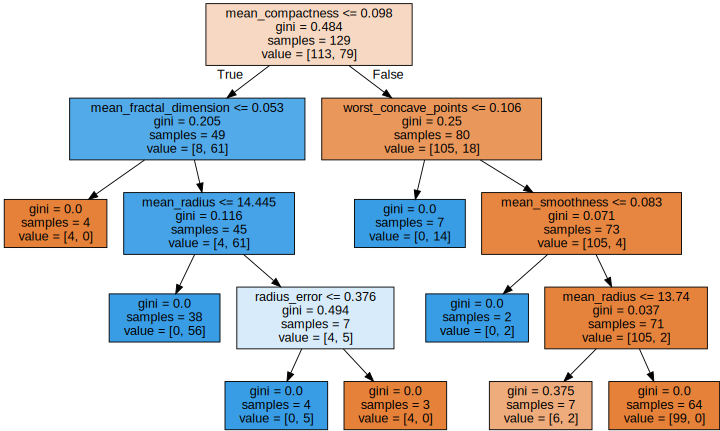

In [221]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 0번 트리
export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot", feature_names=v_feature_name,\
               impurity = True, filled=True)

#tree_final_0.dot그리기
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
fixed_dot_graph = "digraph Tree {\nsize=\"10,10\";\n" + dot_graph.split('{', 1)[1]
display(graphviz.Source(fixed_dot_graph))

#### 결론 도출

feature_importances_ : 설명변수의 중요도

In [64]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
2,PETAL_LENGTH,0.489
3,PETAL_WIDTH,0.364
0,SEPAL_LENGTH,0.129
1,SEPAL_WIDTH,0.019


Text(0, 0.5, '변수')

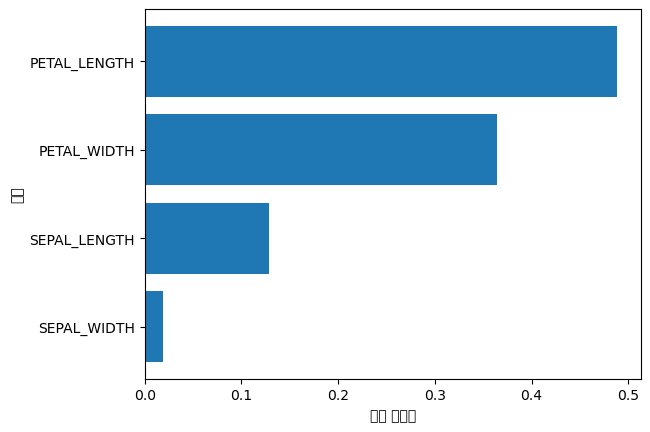

In [65]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")